In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
# loai ra nhung row co quantity <= 0 va UnitPrice <= 0
# df_valid 
cond = (df['Quantity'] > 0) & (df['UnitPrice'] > 0)
df_valid = df[cond]

In [6]:
df_valid.shape

(530104, 8)

In [7]:
# du lieu co bi null hay khong
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    530104 non-null  object 
 1   StockCode    530104 non-null  object 
 2   Description  530104 non-null  object 
 3   Quantity     530104 non-null  int64  
 4   InvoiceDate  530104 non-null  object 
 5   UnitPrice    530104 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      530104 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.4+ MB


In [8]:
# se phan tich theo customerID, minh lay CustomerID
# Loai bo nhung dong maf customerID bi null

df_valid = df_valid[~df_valid['CustomerID'].isna()]

In [9]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [10]:
# bo nhung du lieu bi lap
# drop_duplicates()
df_valid = df_valid.drop_duplicates()

In [11]:
df_valid.shape

(392692, 8)

In [12]:
df_valid.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
pd.options.mode.chained_assignment = None  # default='warn'

In [14]:
#### Clustering / Segmentation  --- Unsupervised Learning
# KMeans, DBSCAN, t-SNE, Hierarchical Clustering

In [15]:
# phai tao ra cac feature de phuc vu cho phan cum
# retail -----> RFM
# R: REcency -----> recency
# F: Frequency ----> frequency
# M: monetary ---> GMV ---> monetary 

In [16]:
# freqeuncy
df_frequency = df_valid.groupby('CustomerID')['InvoiceNo'].nunique().reset_index(name = 'num_invoices')

In [17]:
df_frequency

,CustomerID,num_invoices
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4333,18280.0,1
4334,18281.0,1
4335,18282.0,2
4336,18283.0,16


In [18]:
# monetary
# df_valid['TotalPrice'] = df_valid['Quantity']*df_valid['UnitPrice']
# df_monetary = df_valid.groupby('CustomerID')['TotalPrice'].sum().reset_index()

df_valid['TotalPrice'] = df_valid['Quantity'] * df_valid['UnitPrice']

In [19]:
df_monetary = df_valid.groupby('CustomerID')['TotalPrice'].sum().reset_index(name = 'MonetaryValue')

In [20]:
df_monetary

,CustomerID,MonetaryValue
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2045.53


In [21]:
# recency
# snapshot
df_valid.InvoiceDate.max()

'2011-12-09 12:50:00'

In [22]:
snapshot_date = pd.to_datetime('2011-12-10')

In [23]:
# df_valid
# chuyen column InvoiceDate sang dang datetime
# Lay ra gia tri date
# lay snapshot_date - date

In [24]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
 8   TotalPrice   392692 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.0+ MB


In [25]:
df_valid['InvoiceDate'] = pd.to_datetime(df_valid['InvoiceDate'])

In [26]:
df_valid['date'] = df_valid['InvoiceDate'].dt.date

In [27]:
# last transaction date ???
# groupby theo CustomerID sau do lay gia tri lon nhat cua date ---> last_transaction_date; snapshot_date - last_transaction_date

df_recency = df_valid.groupby('CustomerID')['date'].max().reset_index(name = 'last_tx_date')


In [28]:
df_recency.head()

,CustomerID,last_tx_date
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [29]:
df_recency = df_valid.groupby('CustomerID')['date'].max().reset_index(name = 'last_tx_date')
df_recency['recency'] = (snapshot_date - pd.to_datetime(df_recency.last_tx_date)).dt.days



In [30]:
df_FM = pd.merge(df_frequency,df_monetary, on = 'CustomerID')

In [31]:
df_FM.head()

,CustomerID,num_invoices,MonetaryValue
0,12346.0,1,77183.60
1,12347.0,7,4310.00
2,12348.0,4,1797.24
3,12349.0,1,1757.55
4,12350.0,1,334.40


In [32]:
df_RFM = pd.merge(df_FM,df_recency, on = 'CustomerID')

In [33]:
df_RFM.drop(columns = ['last_tx_date'], axis = 1, inplace = True)

In [34]:
# Chan dung khach hang

In [35]:
# EDA
# Histogram
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# df_RFM

C:\Users\MaiChiKhuong\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_invoices', ylabel='Density'>

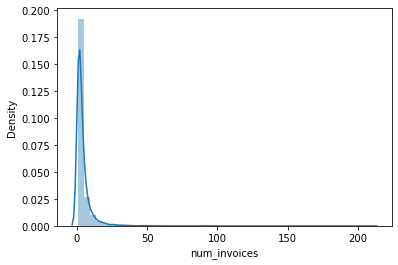

In [37]:
sns.distplot(df_RFM['num_invoices'])

C:\Users\MaiChiKhuong\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

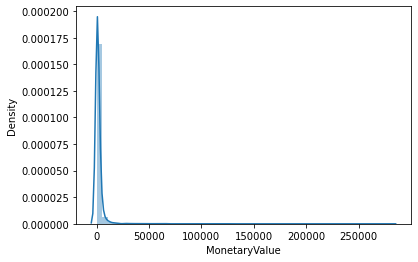

In [38]:
sns.distplot(df_RFM['MonetaryValue'])

C:\Users\MaiChiKhuong\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='recency', ylabel='Density'>

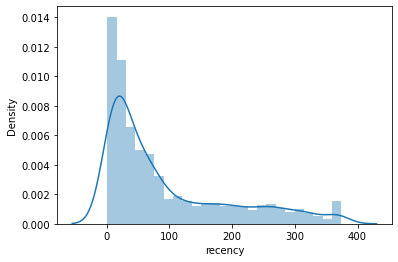

In [39]:
sns.distplot(df_RFM['recency'])

In [40]:
# de-skew
# log-transform
# squareroot transform
# boxcoxtransform

# log(10)

In [41]:
import numpy as np

In [42]:
df_RFM['log_num_invoices'] = np.log(df_RFM['num_invoices'])

C:\Users\MaiChiKhuong\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_num_invoices', ylabel='Density'>

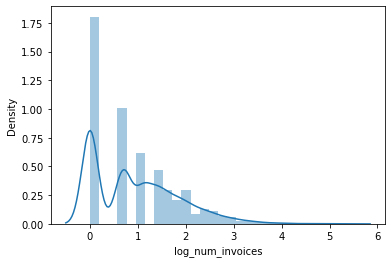

In [43]:
sns.distplot(df_RFM['log_num_invoices'])

In [44]:
# lay log recency, monetary
# sau do ve displto cho 2 cot log moi nay
df_RFM['log_MonetaryValue'] = np.log(df_RFM['MonetaryValue'])

C:\Users\MaiChiKhuong\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_MonetaryValue', ylabel='Density'>

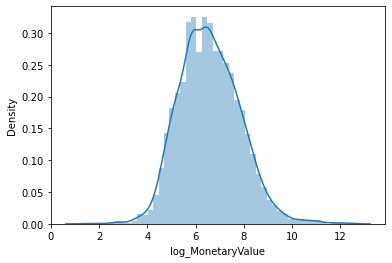

In [45]:
sns.distplot(df_RFM['log_MonetaryValue'])

In [46]:
df_RFM['log_recency'] = np.log(df_RFM['recency'])

C:\Users\MaiChiKhuong\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_recency', ylabel='Density'>

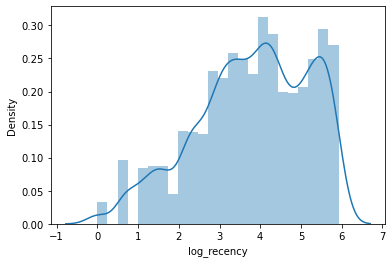

In [47]:
sns.distplot(df_RFM['log_recency'])

In [48]:
df_RFM['num_invoices'].skew()

12.067030826322075

In [49]:
df_RFM['log_num_invoices'].skew()

0.7837267362354379

In [50]:
df_RFM['sqrt_num_invoices'] = np.sqrt(df_RFM['num_invoices'])

C:\Users\MaiChiKhuong\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqrt_num_invoices', ylabel='Density'>

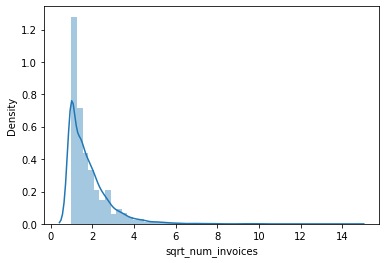

In [51]:
sns.distplot(df_RFM['sqrt_num_invoices'])

In [52]:
df_RFM['sqrt_num_invoices'].skew()

3.0239864372200236

In [53]:
df_RFM

,CustomerID,num_invoices,MonetaryValue,recency,log_num_invoices,log_MonetaryValue,log_recency,sqrt_num_invoices
0,12346.0,1,77183.60,326,0.000000,11.253942,5.786897,1.000000
1,12347.0,7,4310.00,3,1.945910,8.368693,1.098612,2.645751
2,12348.0,4,1797.24,76,1.386294,7.494007,4.330733,2.000000
3,12349.0,1,1757.55,19,0.000000,7.471676,2.944439,1.000000
4,12350.0,1,334.40,311,0.000000,5.812338,5.739793,1.000000
...,...,...,...,...,...,...,...,...
4333,18280.0,1,180.60,278,0.000000,5.196285,5.627621,1.000000
4334,18281.0,1,80.82,181,0.000000,4.392224,5.198497,1.000000
4335,18282.0,2,178.05,8,0.693147,5.182064,2.079442,1.414214
4336,18283.0,16,2045.53,4,2.772589,7.623412,1.386294,4.000000


In [54]:
# khong cung nam mot thang do
# 100   10000000
# feature minh dang 2 cai feature co vai tro tuong duong

# scaling ---> quy chieu ve cung mot tahng do
# MinMaxScaling, StandardScaling

from sklearn.preprocessing import StandardScaler

In [55]:
df_original = df_RFM[['num_invoices','MonetaryValue','recency']]

In [56]:
scaler = StandardScaler()

scaler.fit(df_original)

df_original_normalized = scaler.transform(df_original)

In [57]:
df_original_normalized

array([[-4.25096503e-01,  8.36301037e+00,  2.32938811e+00],
       [ 3.54416797e-01,  2.51698905e-01, -9.00588115e-01],
       [-3.53398530e-02, -2.79878269e-02, -1.70593488e-01],
       ...,
       [-2.95177619e-01, -2.08214334e-01, -8.50588483e-01],
       [ 1.52368675e+00, -3.51515172e-04, -8.90588188e-01],
       [-1.65258736e-01, -2.35311112e-02, -5.00591059e-01]])

In [58]:
from sklearn.cluster import KMeans

In [59]:
model = KMeans(n_clusters = 4, random_state = 100)

In [60]:
model.fit(df_original_normalized)

KMeans(n_clusters=4, random_state=100)

In [61]:
model.labels_

array([1, 0, 0, ..., 0, 1, 0])